# This notebook is used to analyze the characteristics of the features visually

In [1]:
%matplotlib inline
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from sklearn import preprocessing
from scipy import signal

In [3]:
indexes = pd.read_csv('output/CompleteWeeklyIndexes.csv', parse_dates=True,  index_col=0)
indexes['date'] = pd.to_datetime(indexes.index)
indexes.set_index('date', inplace=True)
indexes.head()

,sp500_Close,sp500_Volume,vix_Close,vix_Volume,dji_Close,dji_Volume,ndx_Close,ndx_Volume,n225_Close,n225_Volume,...,hsi_Close,hsi_Volume,n100_Close,n100_Volume,Overall EMV Tracker,infectious_daily_infect_emv_index,GPR,trade_US Trade Policy Uncertainty,trade_Japanese Trade Policy Uncertainty,trade_Trade Policy EMV Fraction
date,,,,,,,,,,,,,,,,,,,,,
2000-01-07,1420.333984,1.068760e+09,25.016000,0.0,11250.781836,182562000.0,3542.894043,1.598166e+09,18476.772461,0.0,...,16169.606250,0.0,949.868006,0.0,NaN,0.252857,NaN,NaN,NaN,NaN
2000-01-14,1448.648023,1.033940e+09,21.684000,0.0,11587.958008,196256000.0,3611.343994,1.609134e+09,18829.544922,0.0,...,15720.128125,0.0,957.357996,0.0,NaN,0.214286,NaN,NaN,NaN,NaN
2000-01-21,1449.492493,1.113750e+09,21.447500,0.0,11413.272461,197595000.0,3810.092468,1.753105e+09,19083.530078,0.0,...,15392.563867,0.0,958.146008,0.0,NaN,0.110000,NaN,NaN,NaN,NaN
2000-01-28,1394.874023,1.106420e+09,23.960000,0.0,10967.587890,195636000.0,3616.111963,1.772902e+09,19141.585938,0.0,...,15560.411914,0.0,948.610010,0.0,24.412899,0.490000,NaN,71.914247,117.577146,0.033573
2000-02-04,1412.439990,1.041000e+09,23.014001,0.0,10992.404102,176876000.0,3744.364014,1.581506e+09,19618.308203,0.0,...,15736.035157,0.0,969.562000,0.0,NaN,0.741429,34.391162,NaN,NaN,NaN


In [4]:
def plot_index(indexes, name):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.plot(indexes.index, indexes[name], 'o-' , markersize=1)
    plt.axhline(np.mean(indexes[name].loc['2000-01-01':'2015-01-01']), ls=':')
    plt.title(name)
    plt.show()
    plt.subplot(2, 1, 1)
    normalized = preprocessing.normalize([np.array(indexes[name].fillna(0))])
    corr = signal.correlate(normalized, normalized, mode='full')
    plt.plot(corr[0], 'o-', markersize=2)
    plt.axhline(2/np.sqrt(len(indexes[name])), ls=':')
    plt.axhline(-2/np.sqrt(len(indexes[name])), ls=':')
    plt.title(name + ' auto-correlation')
    plt.show()

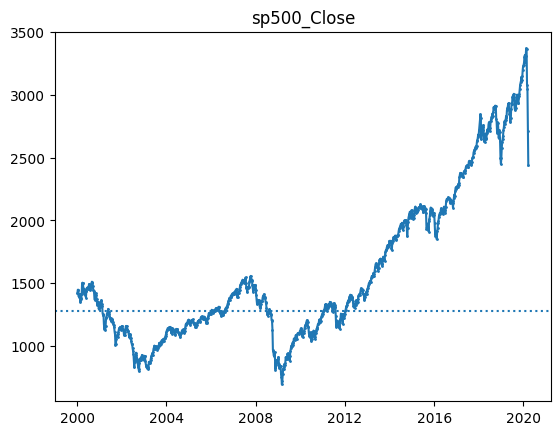

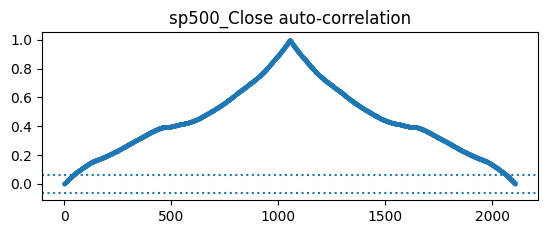

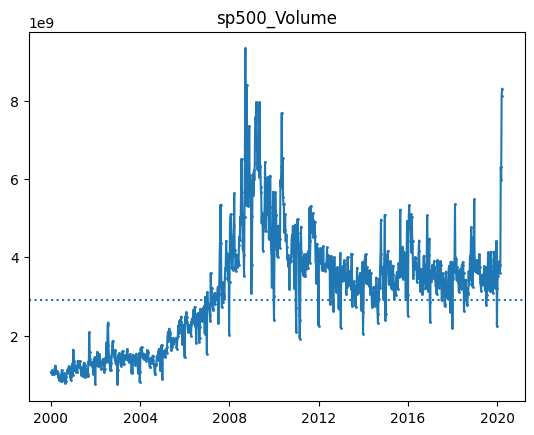

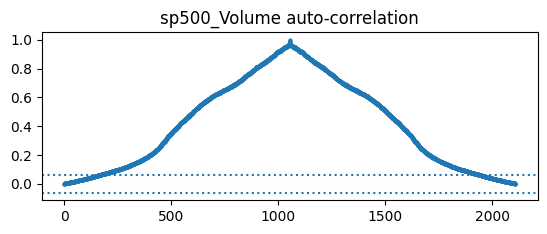

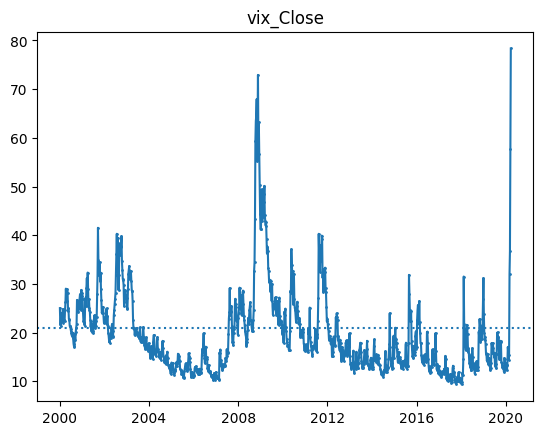

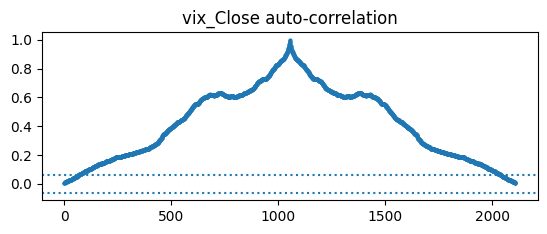

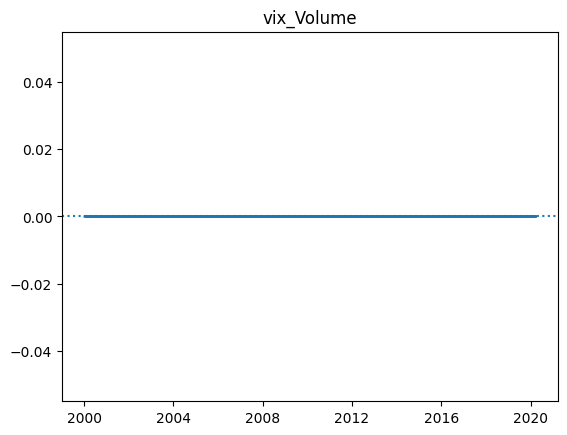

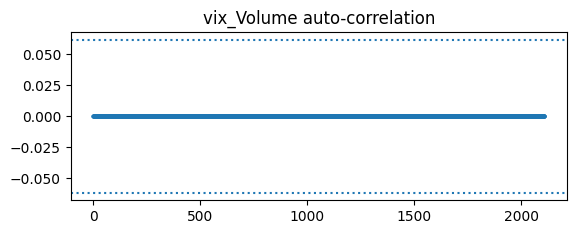

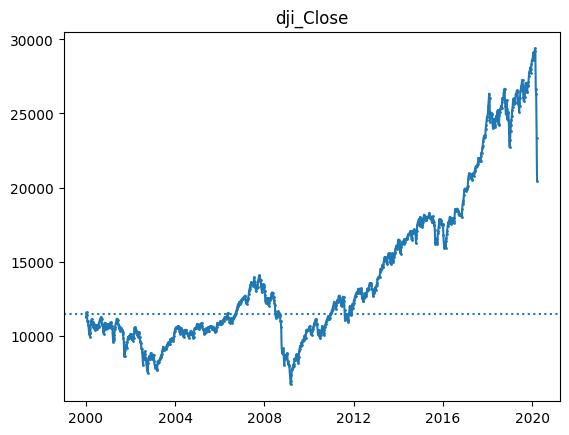

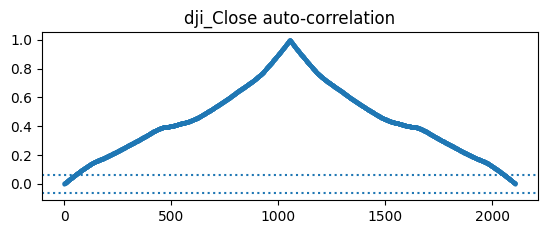

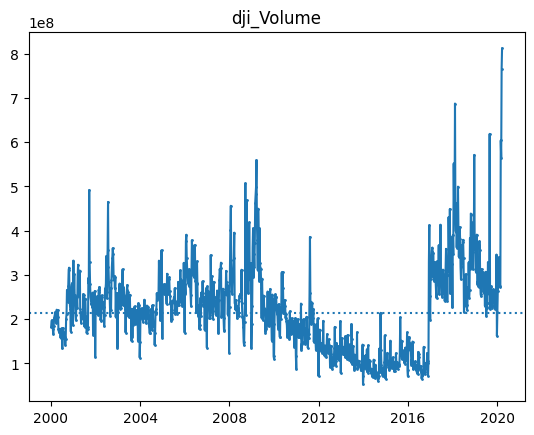

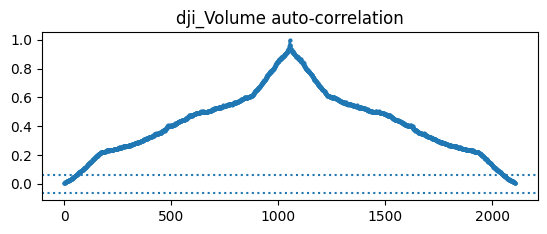

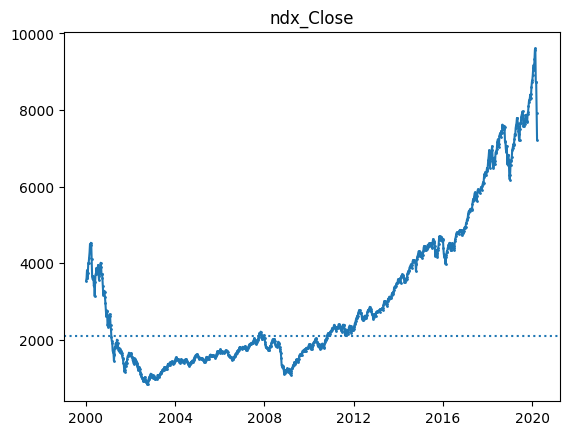

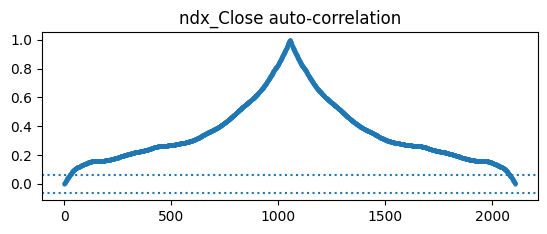

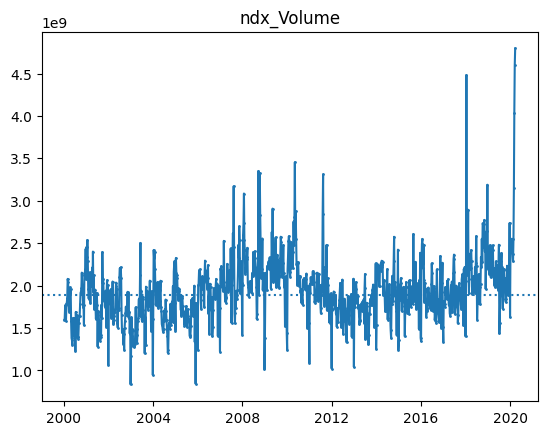

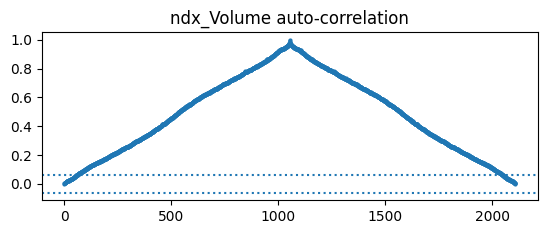

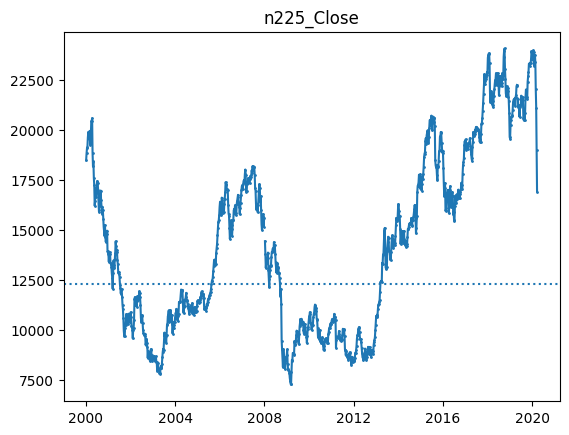

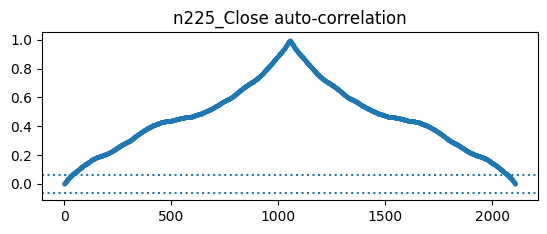

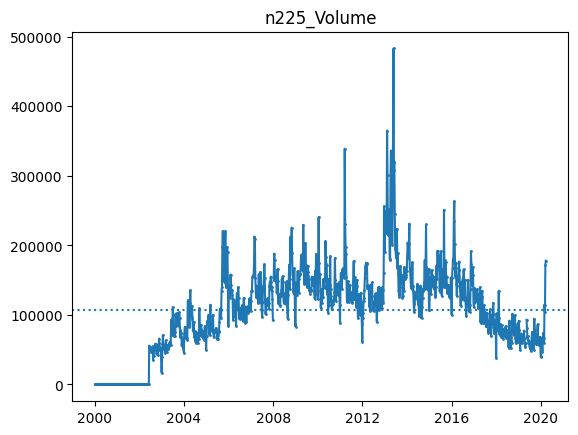

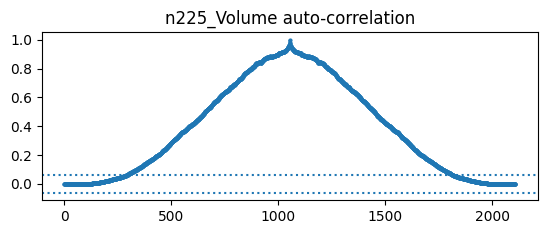

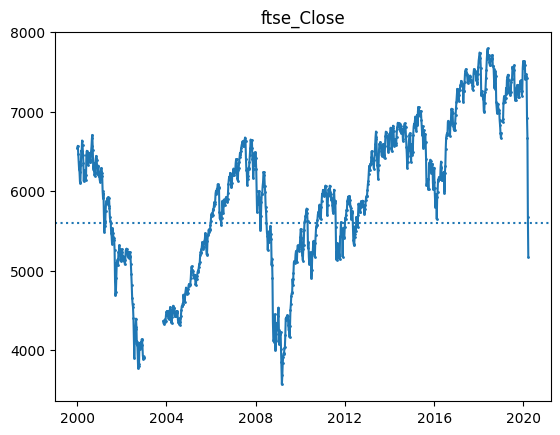

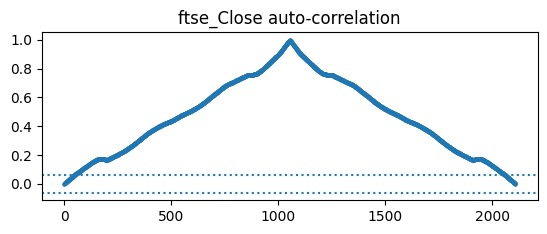

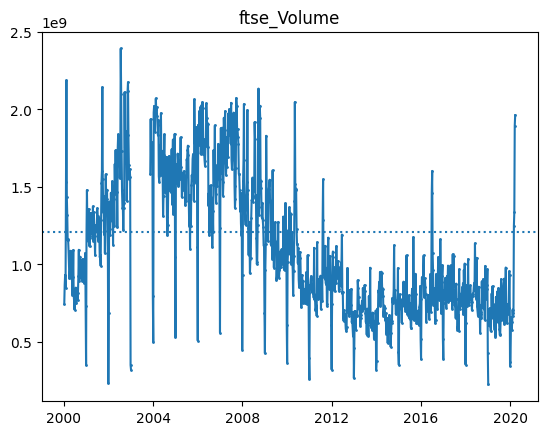

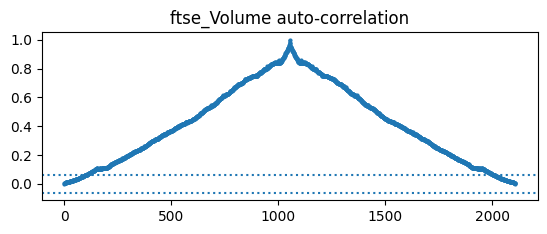

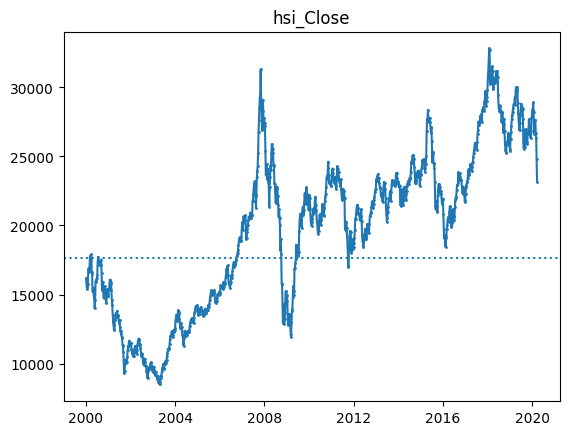

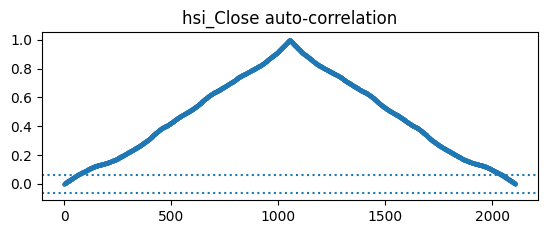

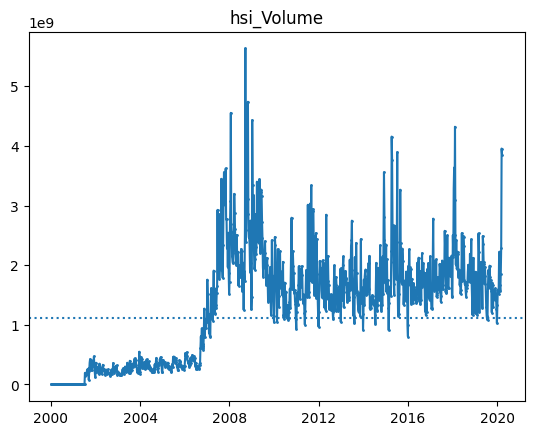

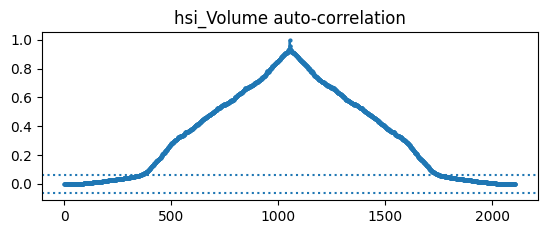

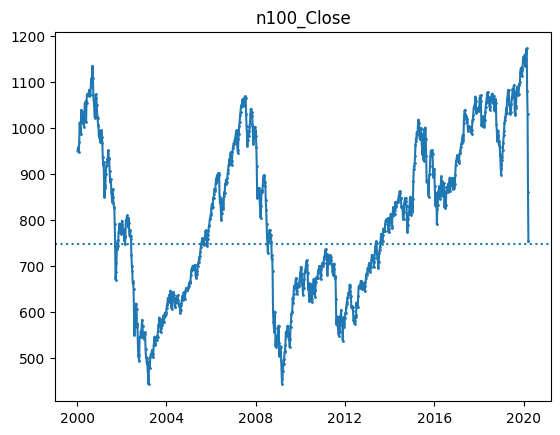

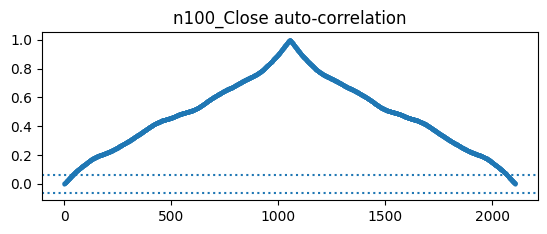

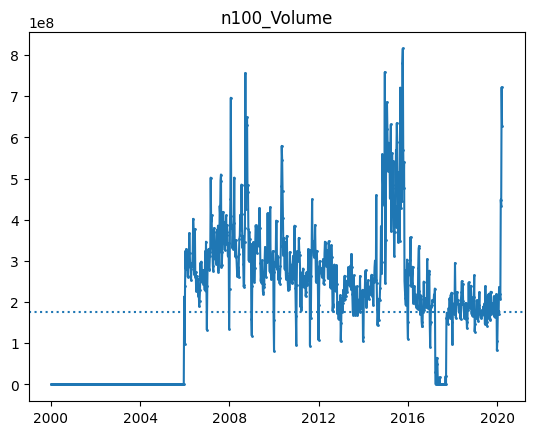

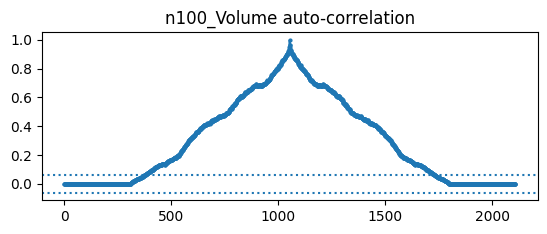

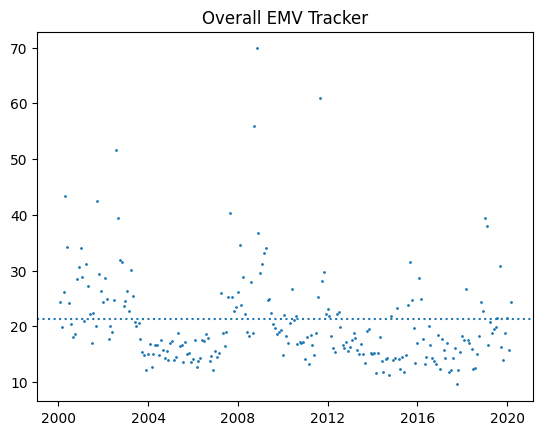

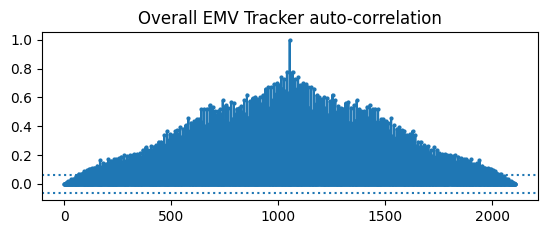

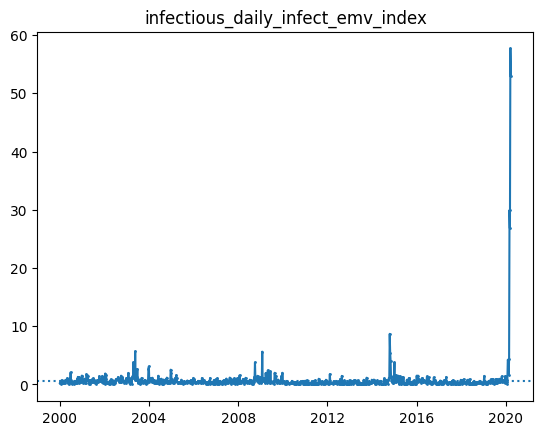

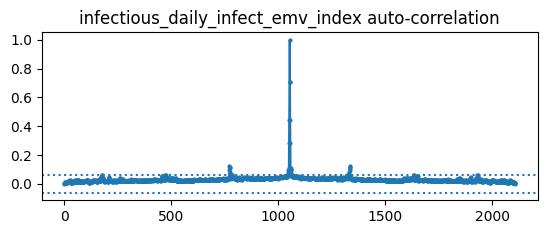

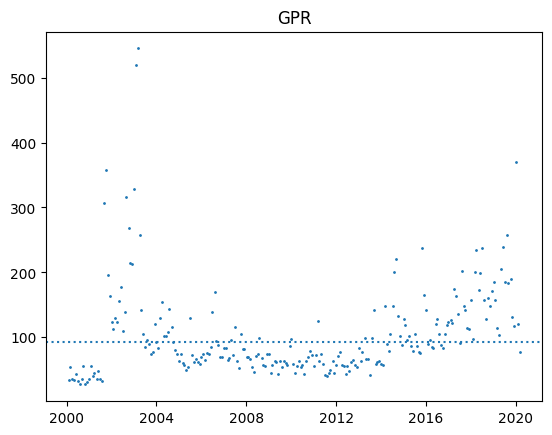

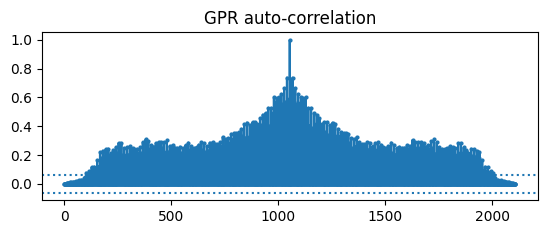

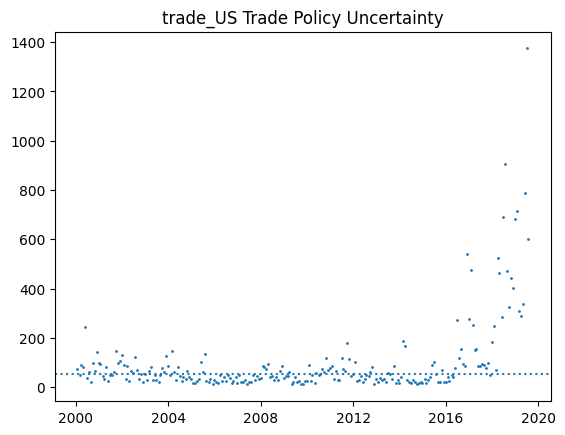

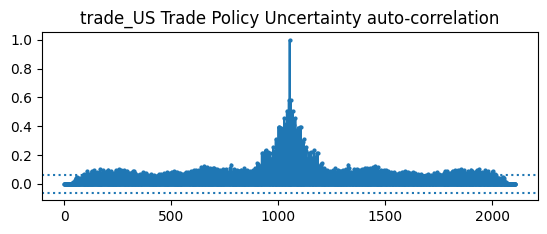

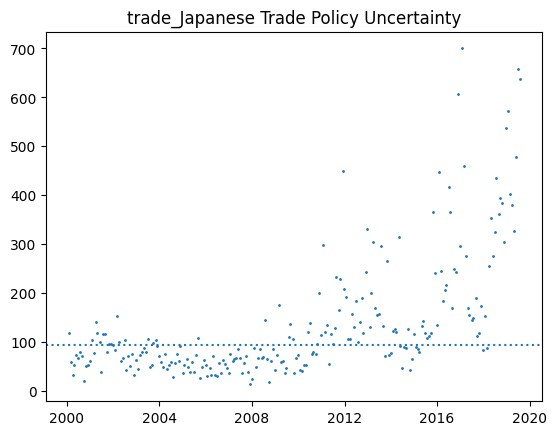

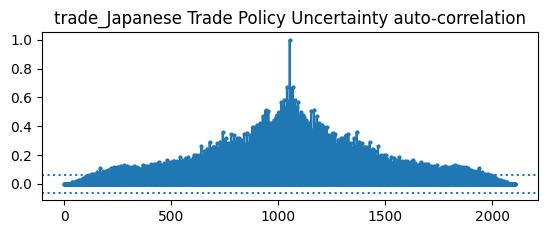

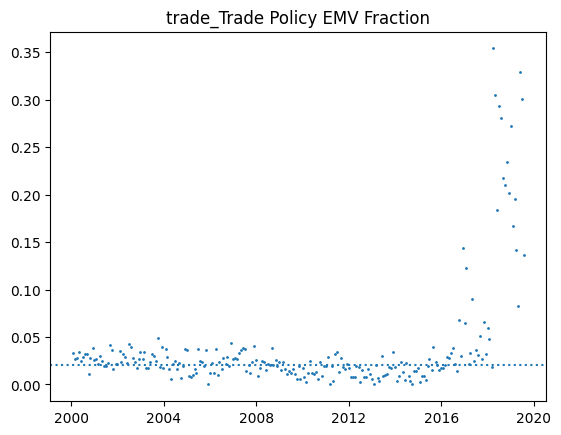

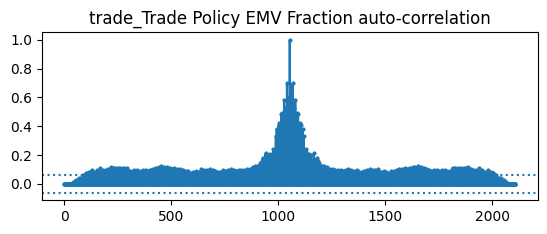

In [5]:
for column in indexes.columns:
    plot_index(indexes, column)
    